In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/chakr/Downloads/Stores.csv")

In [3]:
df.head

<bound method NDFrame.head of      Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0            1        1659             1961                   530        66490
1            2        1461             1752                   210        39820
2            3        1340             1609                   720        54010
3            4        1451             1748                   620        53730
4            5        1770             2111                   450        46620
..         ...         ...              ...                   ...          ...
891        892        1582             1910                  1080        66390
892        893        1387             1663                   850        82080
893        894        1200             1436                  1060        76440
894        895        1299             1560                   770        96610
895        896        1174             1429                  1110        54340

[896 rows x 5 columns

In [4]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [5]:
df.shape

(896, 5)

In [6]:
df["Store_Sales"].idxmin()

31

In [7]:
df.iloc[30]

Store ID                   31
Store_Area               1439
Items_Available          1746
Daily_Customer_Count      990
Store_Sales             80140
Name: 30, dtype: int64

In [8]:
df=df.drop("Store ID ",axis ="columns")

In [9]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [13]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [14]:
df.corr()["Store_Sales"].sort_values()

Daily_Customer_Count    0.008629
Store_Area              0.097474
Items_Available         0.098849
Store_Sales             1.000000
Name: Store_Sales, dtype: float64

In [15]:
import seaborn as sns

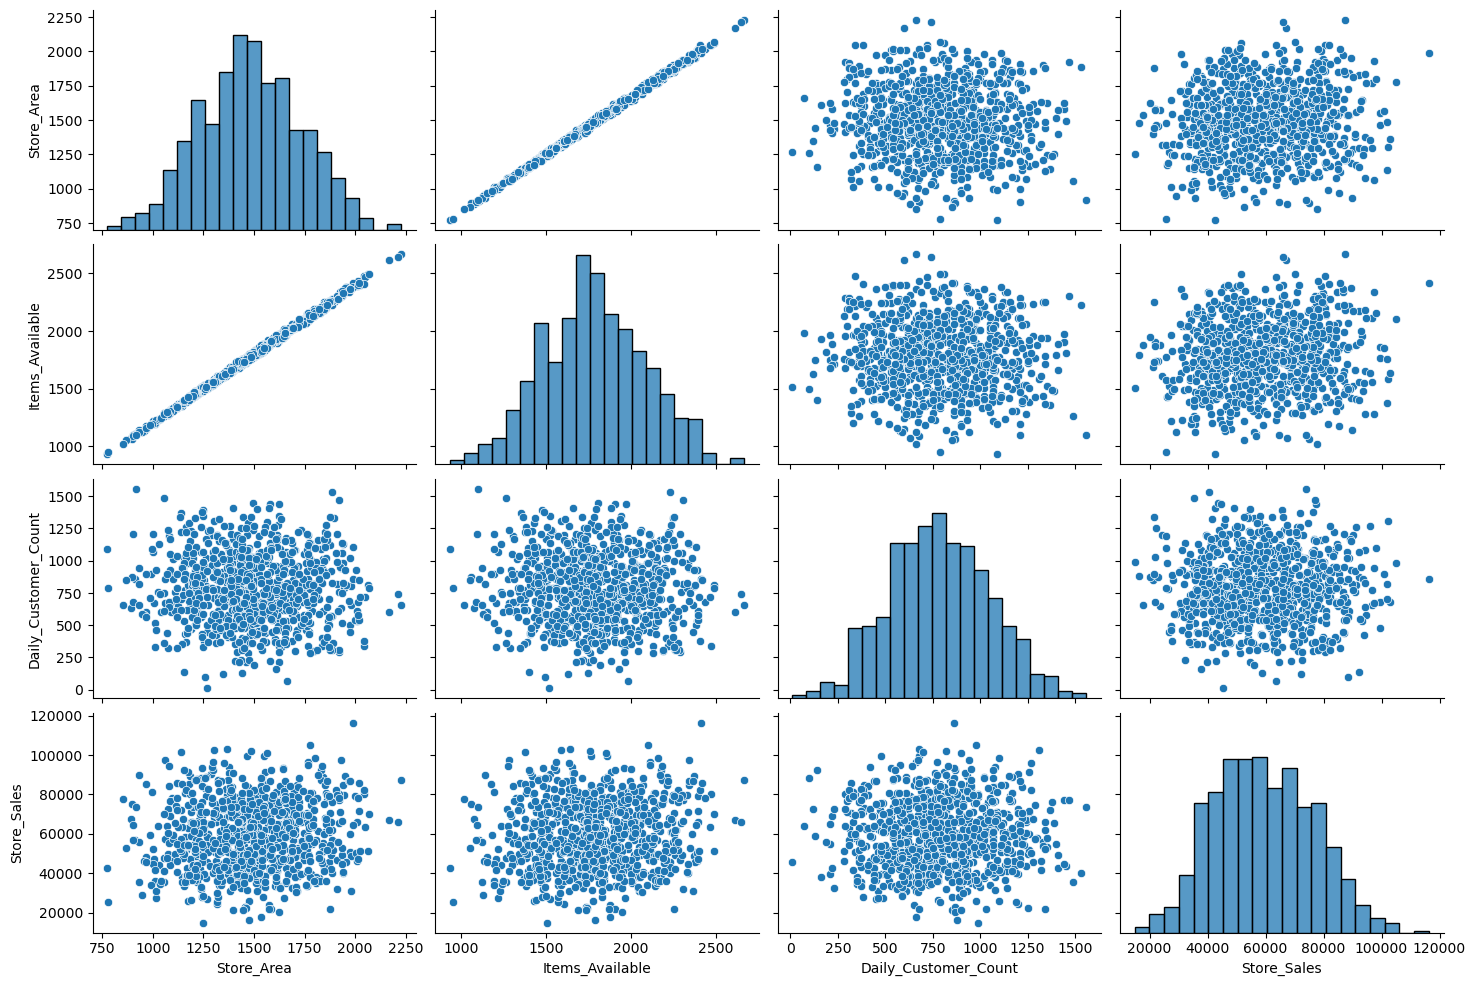

In [16]:
import matplotlib.pyplot as plt
sns.pairplot(df,aspect=1.5)
plt.show()

# Feature Engineering

In [18]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [19]:
import numpy as np

In [20]:
IQRDailyCustomerCount=970-600
upperlim=970+1.5+IQRDailyCustomerCount
lowerlim=600-1.5+IQRDailyCustomerCount
df.loc[df["Daily_Customer_Count"]>upperlim]=np.nan
df.loc[df["Daily_Customer_Count"]<lowerlim]=np.nan


In [21]:
df=df.dropna()

In [22]:
x=df[["Store_Area","Items_Available","Daily_Customer_Count"]]
y=df["Store_Sales"]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.3)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Scaled_X_train=scaler.fit_transform(X_train)
Scaled_X_test=scaler.fit_transform(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression

def modelresults(prediction):
    print("Mean absolute error model is {}.".format(mean_absolute_error(y_test, prediction)))
    print("Root mean square error model is {}.".format(np.sqrt(mean_squared_error(y_test, prediction))))

lr = LinearRegression()
lr.fit(Scaled_X_train, y_train)
predictionlr = lr.predict(Scaled_X_test)
modelresults(predictionlr)


Mean absolute error model is 13741.418508642879.
Root mean square error model is 17272.558839483023.


In [26]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(Scaled_X_train, y_train)
predictionssvr = svr.predict(Scaled_X_test)
modelresults(predictionssvr)


Mean absolute error model is 13395.982185037272.
Root mean square error model is 16862.61986049657.


In [27]:
from sklearn.model_selection import GridSearchCV
svrmodel = SVR()
param_gridsvr = {'C': [0.001, 0.01, 0.1, 0.5], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto'], 'degree': [2, 3, 4, 5]}
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(Scaled_X_train, y_train)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [28]:
print("Best paramets for model is{}".format(gridsvr.best_params_))

Best paramets for model is{'C': 0.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [29]:
predsgridsvr=gridsvr.predict(Scaled_X_test)
modelresults(predsgridsvr)

Mean absolute error model is 13393.949453183688.
Root mean square error model is 16861.3836169274.


In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(Scaled_X_train,y_train)
predsrfr=rfr.predict(Scaled_X_test)
modelresults(predsrfr)

Mean absolute error model is 14938.009375000001.
Root mean square error model is 18369.16577372255.


In [31]:
rfrmodel=RandomForestRegressor()
param_gridfr={'bootstrap':[True],'max_depth':[5,10,15],'max_features':['auto','log2'],'n_estimators':[2,3,4,5,6]}
gridrfr=GridSearchCV(rfrmodel,param_gridfr)
gridrfr.fit(Scaled_X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [32]:
print("Best parameters for model is {}".format(gridrfr.best_params_))

Best parameters for model is {'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 6}


In [33]:
predsgridrfr=gridrfr.predict(Scaled_X_test)

In [34]:
modelresults(predsgridrfr)

Mean absolute error model is 14361.250320336283.
Root mean square error model is 17824.318773966894.
